In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio_train.csv


In [12]:
import numpy as np 
import pandas as pd
import category_encoders as ce
import seaborn  as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/kaggle/input/cardio_train.csv',sep=';')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69301.0,50471.480397,28563.100347,988.0,25745.0,50494.0,75150.0,99999.0
age,69301.0,19468.786280,2467.261818,10798.0,17664.0,19704.0,21326.0,23713.0
gender,69301.0,1.349519,0.476821,1.0,1.0,1.0,2.0,2.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0


In [33]:
df.head() # age in days

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [14]:
def ct_plot(var):
    sns.countplot(x = var,hue='cardio',data = df)
    plt.show()

In [32]:
#unique values of categorical values

print(df.groupby(by='smoke')['cardio'].count())
print(df.groupby(by='active')['cardio'].count())
print(df.groupby(by='alco')['cardio'].count())
print(df.groupby(by='gluc')['cardio'].count())
print(df.groupby(by='cholesterol')['cardio'].count())
print(df.groupby(by='gender')['cardio'].count())

smoke
0    63199
1     6102
Name: cardio, dtype: int64
active
0    13584
1    55717
Name: cardio, dtype: int64
alco
0    65567
1     3734
Name: cardio, dtype: int64
gluc
1    58885
2     5139
3     5277
Name: cardio, dtype: int64
cholesterol
1    51868
2     9446
3     7987
Name: cardio, dtype: int64
gender
1    45079
2    24222
Name: cardio, dtype: int64


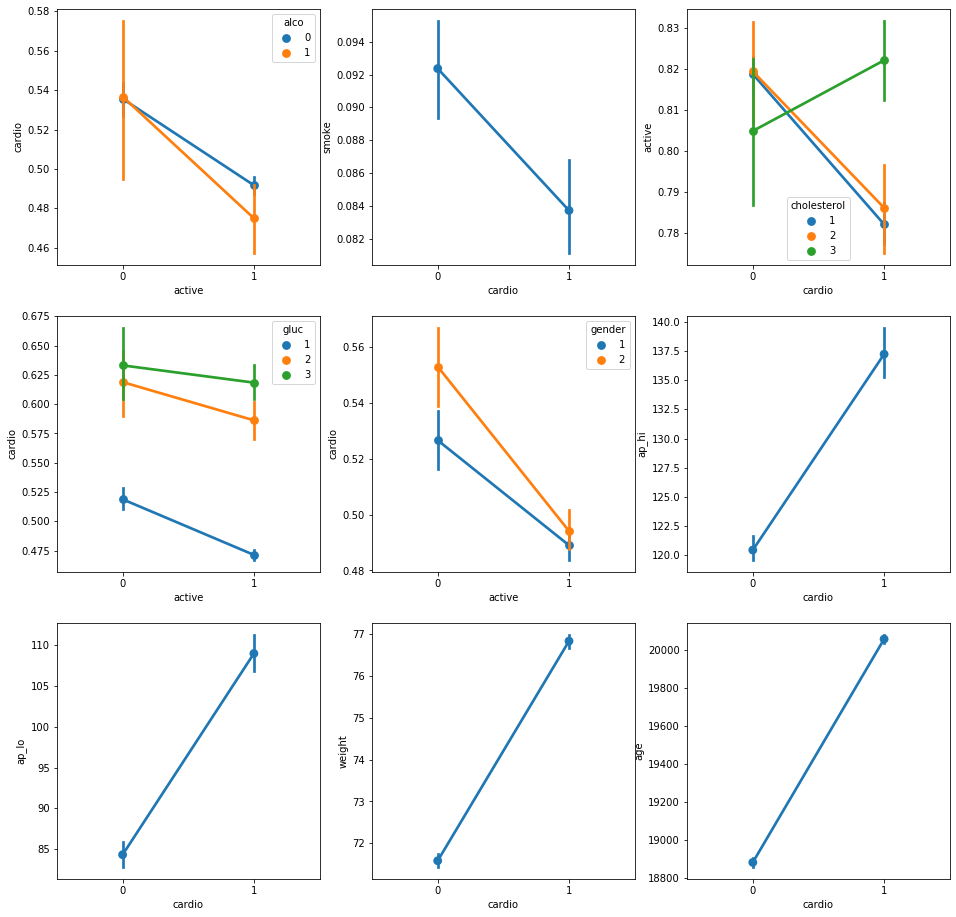

In [16]:
fig, ax = plt.subplots(nrows = 3 , ncols=3 , figsize = (16,16))
sns.pointplot(x='active',y='cardio',hue='alco',data=df,ax=ax[0][0])
sns.pointplot(x='cardio',y='smoke',data=df,ax=ax[0][1])
sns.pointplot(y='active',x='cardio',hue='cholesterol',data=df,ax=ax[0][2])
sns.pointplot(x='active',y='cardio',hue='gluc',data=df,ax=ax[1][0])
sns.pointplot(x='active',y='cardio',hue='gender',data=df,ax=ax[1][1])
sns.pointplot(y='ap_hi',x='cardio',data=df , ax=ax[1][2])
sns.pointplot(y='ap_lo',x='cardio',data=df,ax = ax[2][0])
sns.pointplot(y='weight',x='cardio',data=df,ax = ax[2][1])
sns.pointplot(y = 'age',x='cardio',data=df,ax=ax[2][2])
plt.show()

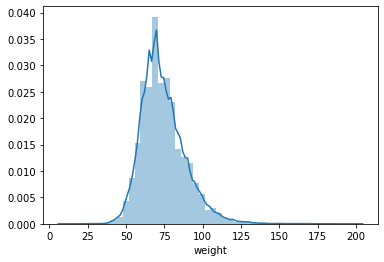

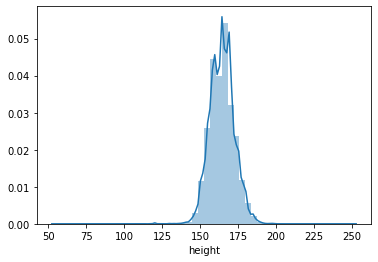

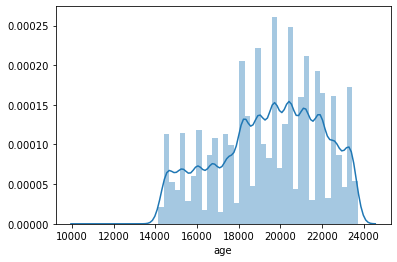

In [17]:
sns.distplot(df['weight'])
plt.show()

sns.distplot(df['height'])
plt.show()

sns.distplot(df['age'])
plt.show()

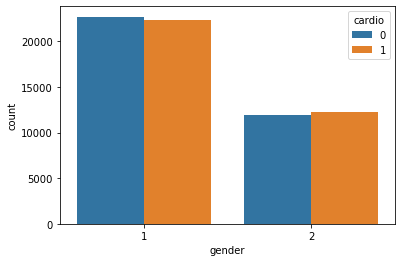

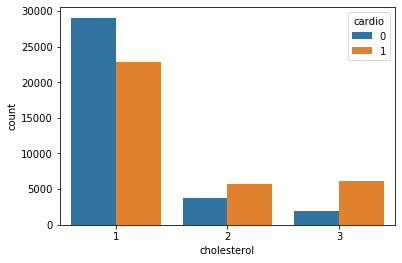

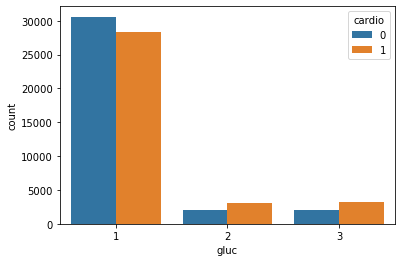

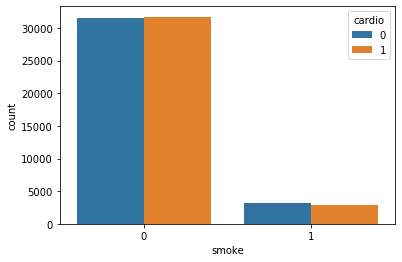

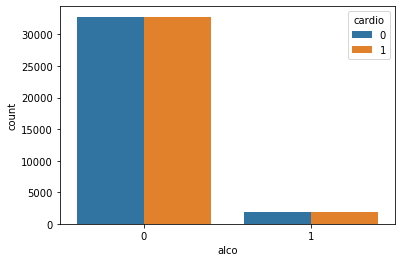

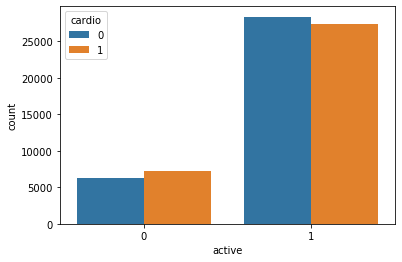

In [18]:
l = ['gender','cholesterol','gluc','smoke','alco','active']
for i in l:
    ct_plot(i)

In [19]:
from sklearn.preprocessing import QuantileTransformer

In [20]:
"""df_one = pd.get_dummies(df,columns=['gender','cholesterol','gluc','smoke','alco','active'],drop_first=True)
#sc = QuantileTransformer(output_distribution='normal')
sc = PowerTransformer()
l = ['age','height','weight','ap_hi','ap_lo']
for i in l:
    df_one[i] = sc.fit_transform(df_one[i].values.reshape(-1,1))
df_one.drop('cardio',axis =1,inplace=True)"""

"df_one = pd.get_dummies(df,columns=['gender','cholesterol','gluc','smoke','alco','active'],drop_first=True)\n#sc = QuantileTransformer(output_distribution='normal')\nsc = PowerTransformer()\nl = ['age','height','weight','ap_hi','ap_lo']\nfor i in l:\n    df_one[i] = sc.fit_transform(df_one[i].values.reshape(-1,1))\ndf_one.drop('cardio',axis =1,inplace=True)"

In [21]:
woe = ce.WOEEncoder(cols=['gender','cholesterol','gluc','smoke','alco','active','ap_hi','ap_lo','age'])
df_train = woe.fit_transform(df.iloc[:,1:-1],df.iloc[:,-1])

sc = QuantileTransformer(output_distribution='normal')
#sc = PowerTransformer()
#sc = MinMaxScaler()
l = ['height','weight']
for i in l:
    df_train[i] = sc.fit_transform(df_train[i].values.reshape(-1,1))

In [22]:
import seaborn as sns
df['ap_hi'].describe()

count    69301.000000
mean       128.829584
std        154.775805
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

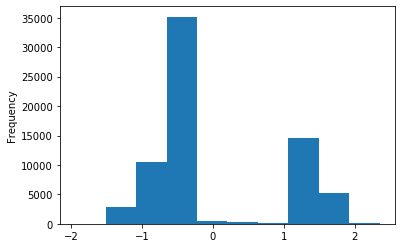

In [23]:
df_train['ap_lo'].plot.hist()

In [24]:
from sklearn.linear_model import LogisticRegression,SGDClassifier,PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.svm import NuSVC,SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [25]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(max_iter=3000)
"""clf2 = LinearDiscriminantAnalysis()
clf3 = QuadraticDiscriminantAnalysis()
clf4 = KNeighborsClassifier(n_neighbors=30)
clf5 = SGDClassifier(loss='hinge',alpha= 0.0001)
clf6 = BernoulliNB()
clf7 = GaussianNB()
clf13 = NuSVC(kernel='linear')
clf8 = RandomForestClassifier()"""

"clf2 = LinearDiscriminantAnalysis()\nclf3 = QuadraticDiscriminantAnalysis()\nclf4 = KNeighborsClassifier(n_neighbors=30)\nclf5 = SGDClassifier(loss='hinge',alpha= 0.0001)\nclf6 = BernoulliNB()\nclf7 = GaussianNB()\nclf13 = NuSVC(kernel='linear')\nclf8 = RandomForestClassifier()"

In [26]:
"""clf9 = AdaBoostClassifier(base_estimator=clf)
clf10 = BaggingClassifier(base_estimator=clf)
clf11 = GradientBoostingClassifier()
clf12 = XGBClassifier()
clf13 = PassiveAggressiveClassifier()"""

'clf9 = AdaBoostClassifier(base_estimator=clf)\nclf10 = BaggingClassifier(base_estimator=clf)\nclf11 = GradientBoostingClassifier()\nclf12 = XGBClassifier()\nclf13 = PassiveAggressiveClassifier()'

In [27]:
sc = cross_val_score(clf, df_train.iloc[:,:],df.iloc[:,-1] ,cv =7,n_jobs=-1)
sc.mean() ,sc.std()

(0.7558188621465058, 0.0039029934204642494)

In [28]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(df_train.iloc[:,:] , df.iloc[:,-1], stratify =df.iloc[:,-1] ,test_size =0.2,random_state=42)

In [29]:
#, stratify =df.iloc[:,-1],
from sklearn.metrics import confusion_matrix , accuracy_score
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[5424 1512]
 [1898 5027]]
0.7539860038958228


In [30]:
"""from sklearn.ensemble import StackingClassifier ,VotingClassifier
clf14  = StackingClassifier(estimators=[
    ('lda' , clf2) , ('lg' ,clf)
])
x_train.shape,x_test.shape
clf14.fit(df_train.iloc[:,:] , df.iloc[:,-1])
clf14.score(df_train.iloc[:,:] , df.iloc[:,-1])"""

"from sklearn.ensemble import StackingClassifier ,VotingClassifier\nclf14  = StackingClassifier(estimators=[\n    ('lda' , clf2) , ('lg' ,clf)\n])\nx_train.shape,x_test.shape\nclf14.fit(df_train.iloc[:,:] , df.iloc[:,-1])\nclf14.score(df_train.iloc[:,:] , df.iloc[:,-1])"